In [25]:
import sklearn
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import RandomTreesEmbedding, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Ridge
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV
from sklearn.linear_model import MultiTaskElasticNet, MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLasso, MultiTaskLassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid, ParameterSampler, RandomizedSearchCV
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, KernelCenterer, RobustScaler
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
import time
from keras_tuner.tuners import RandomSearch
import keras_tuner
from keras_tuner.tuners import Hyperband
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_all = pd.read_csv('data_all.csv')

In [5]:
df_V_10 = df_all[(df_all['V'] >= 9) & (df_all['V'] <= 11)  ]
df_V_20 = df_all[(df_all['V'] >= 19) & (df_all['V'] <= 21) ]
df_V_30 = df_all[(df_all['V'] >= 29) & (df_all['V'] <= 31) ]
df_V_40 = df_all[(df_all['V'] >= 39) & (df_all['V'] <= 41) ]
df_V_50 = df_all[(df_all['V'] >= 49) & (df_all['V'] <= 51) ]

In [6]:
print(len(df_V_10)+len(df_V_20)+len(df_V_30)+len(df_V_40)+len(df_V_50))

6750


## Z-SCORE THRESHOLD 3

In [37]:
import pandas as pd
import numpy as np

z_threshold = 3

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1350


In [67]:
import pandas as pd
import numpy as np

z_threshold = 3

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
outliers_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
        continue
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])
    outliers_data_20.append(group[~non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
outliers_data_20 = pd.concat(outliers_data_20, ignore_index = False)
print(len(cleaned_data_20))
print(len(outliers_data_20))

1349
1


In [68]:
cleaned_data_20

,Pβ2,Pα1,Pβ1,Pα2,P3,V,α,β
0,0.04377,-0.22726,-0.19696,0.16666,0.05050,20.109356,-30,-20
1,0.04545,-0.22389,-0.19527,0.16666,0.05387,20.109356,-30,-20
2,0.04545,-0.22389,-0.19527,0.16834,0.05387,20.109356,-30,-20
3,0.04545,-0.22389,-0.19696,0.16834,0.05387,20.109356,-30,-20
4,0.04545,-0.22389,-0.19864,0.16666,0.05387,20.109356,-30,-20
...,...,...,...,...,...,...,...,...
1344,-0.37035,-0.13299,-0.35856,-0.27608,-0.37372,20.019834,90,0
1345,-0.36866,-0.13467,-0.36025,-0.27271,-0.37035,20.019834,90,0
1346,-0.37203,-0.13299,-0.36698,-0.27103,-0.37540,20.019834,90,0
1347,-0.36866,-0.13131,-0.37203,-0.27608,-0.38045,20.019834,90,0


In [69]:
outliers_data_20

,Pβ2,Pα1,Pβ1,Pα2,P3,V,α,β
1605,-0.13636,0.21716,-0.18854,-0.26598,-0.0303,20.115891,45,-5


In [9]:
import pandas as pd
import numpy as np

z_threshold = 3

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1348


In [10]:
import pandas as pd
import numpy as np

z_threshold = 3

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1349


In [11]:
import pandas as pd
import numpy as np

z_threshold = 3

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1349


In [12]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

In [16]:
type(all_new_data)

pandas.core.frame.DataFrame

In [17]:
all_new_data.to_csv('z_score_3_data_all.csv', index = False)

### FITTING TEST 

In [13]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [14]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999813635029 
 Beta : 0.9754799679356125 
 V : 0.9999997386818632 
MAE : 
 Alpha : 0.002900631737174526 
 Beta : 0.6113072692778525 
 V : 0.0018535838752071477 
MSE : 
 Alpha : 2.4341832081807376e-05 
 Beta : 2.717894768619115 
 V : 5.205299177745659e-05 
Max AERR : 
 V     0.084610
α     0.048644
β    15.683398
dtype: float64
Waktu yang dibutuhkan :  1.3664827704429627


In [15]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999994665186823 
 Beta : 0.9766057978580309 
 V : 0.9999997622613017 
MAE : 
 Alpha : 0.007448516307425146 
 Beta : 0.5135625010666096 
 V : 0.001648827531161867 
MSE : 
 Alpha : 0.006968000781198357 
 Beta : 2.593103445000091 
 V : 4.735611027962295e-05 
Max AERR : 
 V     0.085385
α     2.480493
β    15.790903
dtype: float64
Waktu yang dibutuhkan :  1.8717913150787353


## Z-SCORE THRESHOLD 2.9

In [18]:
import pandas as pd
import numpy as np

z_threshold = 2.9

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1350


In [19]:
import pandas as pd
import numpy as np

z_threshold = 2.9

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
print(len(cleaned_data_20))

1347


In [20]:
import pandas as pd
import numpy as np

z_threshold = 2.9

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1347


In [21]:
import pandas as pd
import numpy as np

z_threshold = 2.9

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1349


In [22]:
import pandas as pd
import numpy as np

z_threshold = 2.9

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1349


In [23]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

In [24]:
all_new_data.to_csv('z_score_2_9_data_all.csv', index = False)

### FITTING TEST

In [26]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [27]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999780115081 
 Beta : 0.9765728253213541 
 V : 0.9999997011930635 
MAE : 
 Alpha : 0.0030920227924256813 
 Beta : 0.5866175224948335 
 V : 0.0019867347370575777 
MSE : 
 Alpha : 2.8258827567068533e-05 
 Beta : 2.5282095331334786 
 V : 6.045829308507132e-05 
Max AERR : 
 V     0.084659
α     0.044131
β    14.264637
dtype: float64
Waktu yang dibutuhkan :  1.4488877415657044


In [28]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999945551939211 
 Beta : 0.9767137482482344 
 V : 0.9999997262559935 
MAE : 
 Alpha : 0.00698675680957439 
 Beta : 0.5332009038536822 
 V : 0.001956720461737238 
MSE : 
 Alpha : 0.006997471056273844 
 Beta : 2.513001438599545 
 V : 5.5387252948957966e-05 
Max AERR : 
 V     0.083771
α     2.448134
β    15.197979
dtype: float64
Waktu yang dibutuhkan :  1.8403093218803406


## Z-SCORE THRESHOLD 2.8

In [29]:
import pandas as pd
import numpy as np

z_threshold = 2.8

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1328


In [30]:
import pandas as pd
import numpy as np

z_threshold = 2.8

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
print(len(cleaned_data_20))

1340


In [31]:
import pandas as pd
import numpy as np

z_threshold = 2.8

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1343


In [32]:
import pandas as pd
import numpy as np

z_threshold = 2.8

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1343


In [33]:
import pandas as pd
import numpy as np

z_threshold = 2.8

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1347


In [34]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

### FITTING TEST

In [35]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [36]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999928710842 
 Beta : 0.9792938942611902 
 V : 0.9999997056095283 
MAE : 
 Alpha : 0.0022288091378396997 
 Beta : 0.5778565393704921 
 V : 0.0018750183123913656 
MSE : 
 Alpha : 9.210824079675487e-06 
 Beta : 2.4025502389082196 
 V : 5.8945466889822694e-05 
Max AERR : 
 V     0.084613
α     0.026814
β    13.696253
dtype: float64
Waktu yang dibutuhkan :  1.354686963558197


In [37]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999933231495252 
 Beta : 0.978647107563091 
 V : 0.9999997353578857 
MAE : 
 Alpha : 0.006661024373368182 
 Beta : 0.5346779347186728 
 V : 0.0017969770983179128 
MSE : 
 Alpha : 0.008626738828328437 
 Beta : 2.477597548896993 
 V : 5.298898736363187e-05 
Max AERR : 
 V     0.085386
α     2.655496
β    14.544796
dtype: float64
Waktu yang dibutuhkan :  1.859025001525879


## Z-SCORE THRESHOLD 2.7

In [38]:
import pandas as pd
import numpy as np

z_threshold = 2.7

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1328


In [39]:
import pandas as pd
import numpy as np

z_threshold = 2.7

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
print(len(cleaned_data_20))

1339


In [40]:
import pandas as pd
import numpy as np

z_threshold = 2.7

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1341


In [41]:
import pandas as pd
import numpy as np

z_threshold = 2.7

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1343


In [42]:
import pandas as pd
import numpy as np

z_threshold = 2.7

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1346


In [43]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

### FITTING TEST

In [44]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [45]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999912061106 
 Beta : 0.9761174703923075 
 V : 0.9999997492834564 
MAE : 
 Alpha : 0.002279066439286591 
 Beta : 0.5708576214463845 
 V : 0.0018520683863427981 
MSE : 
 Alpha : 1.1141753386314333e-05 
 Beta : 2.6747342512682972 
 V : 5.023267226096522e-05 
Max AERR : 
 V     0.079798
α     0.030115
β    17.083488
dtype: float64
Waktu yang dibutuhkan :  1.3488304217656453


In [46]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999932851331224 
 Beta : 0.9780557789567046 
 V : 0.9999997819286868 
MAE : 
 Alpha : 0.0072397878131665065 
 Beta : 0.5157966810825689 
 V : 0.001585789287371813 
MSE : 
 Alpha : 0.00850765658658202 
 Beta : 2.4576525437656906 
 V : 4.369199035954728e-05 
Max AERR : 
 V     0.080126
α     2.643439
β    17.768267
dtype: float64
Waktu yang dibutuhkan :  1.833103891213735


## Z-SCORE THRESHOLD 2.6

In [47]:
import pandas as pd
import numpy as np

z_threshold = 2.6

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1328


In [48]:
import pandas as pd
import numpy as np

z_threshold = 2.6

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
print(len(cleaned_data_20))

1338


In [49]:
import pandas as pd
import numpy as np

z_threshold = 2.6

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1340


In [50]:
import pandas as pd
import numpy as np

z_threshold = 2.6

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1340


In [51]:
import pandas as pd
import numpy as np

z_threshold = 2.6

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1344


In [52]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

### FITTING TEST

In [53]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [54]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999999995167949 
 Beta : 0.9791716741048726 
 V : 0.9999997151212541 
MAE : 
 Alpha : 0.001771751594450786 
 Beta : 0.5751151168128884 
 V : 0.002000005041905488 
MSE : 
 Alpha : 6.169614428967898e-06 
 Beta : 2.361661429828711 
 V : 5.6855625384225725e-05 
Max AERR : 
 V     0.079379
α     0.019181
β    14.008527
dtype: float64
Waktu yang dibutuhkan :  1.3416770776112874


In [55]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999932407930304 
 Beta : 0.9784610709656596 
 V : 0.9999997219157577 
MAE : 
 Alpha : 0.006972931763854953 
 Beta : 0.5247231135081717 
 V : 0.0019769895011066863 
MSE : 
 Alpha : 0.00863022789630946 
 Beta : 2.442234589392489 
 V : 5.549958967858845e-05 
Max AERR : 
 V     0.079650
α     2.652062
β    14.140602
dtype: float64
Waktu yang dibutuhkan :  1.840483554204305


## Z-SCORE THRESHOLD 2.5

In [56]:
import pandas as pd
import numpy as np

z_threshold = 2.5

# Initialize an empty list to store cleaned data
cleaned_data_10 = []
for (alpha, beta), group in df_V_10.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_10.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_10.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_10 = pd.concat(cleaned_data_10, ignore_index=True)
print(len(cleaned_data_10))

1313


In [57]:
import pandas as pd
import numpy as np

z_threshold = 2.5

# Initialize an empty list to store cleaned data
cleaned_data_20 = []
for (alpha, beta), group in df_V_20.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_20.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_20.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_20 = pd.concat(cleaned_data_20, ignore_index=True)
print(len(cleaned_data_20))

1331


In [58]:
import pandas as pd
import numpy as np

z_threshold = 2.5

# Initialize an empty list to store cleaned data
cleaned_data_30 = []
for (alpha, beta), group in df_V_30.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_30.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_30.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_30 = pd.concat(cleaned_data_30, ignore_index=True)
print(len(cleaned_data_30))

1336


In [59]:
import pandas as pd
import numpy as np

z_threshold = 2.5

# Initialize an empty list to store cleaned data
cleaned_data_40 = []
for (alpha, beta), group in df_V_40.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_40.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_40.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_40 = pd.concat(cleaned_data_40, ignore_index=True)
print(len(cleaned_data_40))

1335


In [60]:
import pandas as pd
import numpy as np

z_threshold = 2.5

# Initialize an empty list to store cleaned data
cleaned_data_50 = []
for (alpha, beta), group in df_V_50.groupby(["α", "β"]):
    # Compute mean and standard deviation for the pressure columns
    pressure_columns = ['P3', 'Pα1', 'Pα2', 'Pβ1', 'Pβ2']
    stats = group[pressure_columns].agg(['mean', 'std'])
    zero_std = stats.loc['std'] == 0.0
    if zero_std.any():
        cleaned_data_50.append(group)
    z_scores = (group[pressure_columns] - stats.loc['mean']) / stats.loc['std']
    # Identify non-outlier rows (where all z-scores are within the threshold)
    non_outliers = (z_scores.abs() <= z_threshold).all(axis=1)
    # Append non-outlier rows to the cleaned data
    cleaned_data_50.append(group[non_outliers])

# Combine all cleaned groups into a single DataFrame
cleaned_data_50 = pd.concat(cleaned_data_50, ignore_index=True)
print(len(cleaned_data_50))

1338


In [61]:
all_new_data = pd.concat([cleaned_data_10,cleaned_data_20,cleaned_data_30,cleaned_data_40,cleaned_data_50])

### FITTING TEST

In [62]:
x_all = all_new_data.drop(columns = ["V","α","β"])
y_all = all_new_data[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [63]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999931019136 
 Beta : 0.982227001085832 
 V : 0.9999997535388361 
MAE : 
 Alpha : 0.0018323850878978155 
 Beta : 0.5387267442318192 
 V : 0.001572387393475513 
MSE : 
 Alpha : 8.702268188455206e-06 
 Beta : 2.16812285658718 
 V : 4.943905935168619e-05 
Max AERR : 
 V     0.084991
α     0.026908
β    15.025953
dtype: float64
Waktu yang dibutuhkan :  1.337063189347585


In [64]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999945979513202 
 Beta : 0.9834545486812505 
 V : 0.9999997853379387 
MAE : 
 Alpha : 0.00505256846849271 
 Beta : 0.4465870642879665 
 V : 0.0015456515827060463 
MSE : 
 Alpha : 0.006814944511650097 
 Beta : 2.0183746901675144 
 V : 4.30602948504591e-05 
Max AERR : 
 V     0.084669
α     2.152655
β    14.780878
dtype: float64
Waktu yang dibutuhkan :  1.846268399556478


In [65]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto'))),
    ('svr', Pipeline([('scaler', scaler), ('svr', SVR(C=1.0, epsilon=0.1, kernel = 'rbf'))])),
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999921403719 
 Beta : 0.9822815940253691 
 V : 0.9999997534598746 
MAE : 
 Alpha : 0.0018400405853903606 
 Beta : 0.5371282939278252 
 V : 0.0015881262248832802 
MSE : 
 Alpha : 9.915299172441851e-06 
 Beta : 2.16146308011445 
 V : 4.9454898686288036e-05 
Max AERR : 
 V     0.084999
α     0.028910
β    15.078383
dtype: float64
Waktu yang dibutuhkan :  1.5768893202145895


In [66]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=21, max_leaf_nodes= 800)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05789, random_state=42, max_depth = 10)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', p =1)))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999945979513202 
 Beta : 0.9834545486812505 
 V : 0.9999997853379387 
MAE : 
 Alpha : 0.00505256846849271 
 Beta : 0.4465870642879665 
 V : 0.0015456515827060463 
MSE : 
 Alpha : 0.006814944511650097 
 Beta : 2.0183746901675144 
 V : 4.30602948504591e-05 
Max AERR : 
 V     0.084669
α     2.152655
β    14.780878
dtype: float64
Waktu yang dibutuhkan :  1.849704094727834


In [67]:
y0_pred_df = pd.DataFrame(y0_pred)

In [68]:
y0_pred_10 = y0_pred_df[(y0_pred_df[0] >= 9.5) & (y0_pred_df[0] <= 10.5)]
y0_pred_20 = y0_pred_df[(y0_pred_df[0] >= 19.5) & (y0_pred_df[0] <= 20.5)]
y0_pred_30 = y0_pred_df[(y0_pred_df[0] >= 29.5) & (y0_pred_df[0] <= 30.5)]
y0_pred_40 = y0_pred_df[(y0_pred_df[0] >= 39.5) & (y0_pred_df[0] <= 40.5)]
y0_pred_50 = y0_pred_df[(y0_pred_df[0] >= 49.5) & (y0_pred_df[0] <= 50.5)]

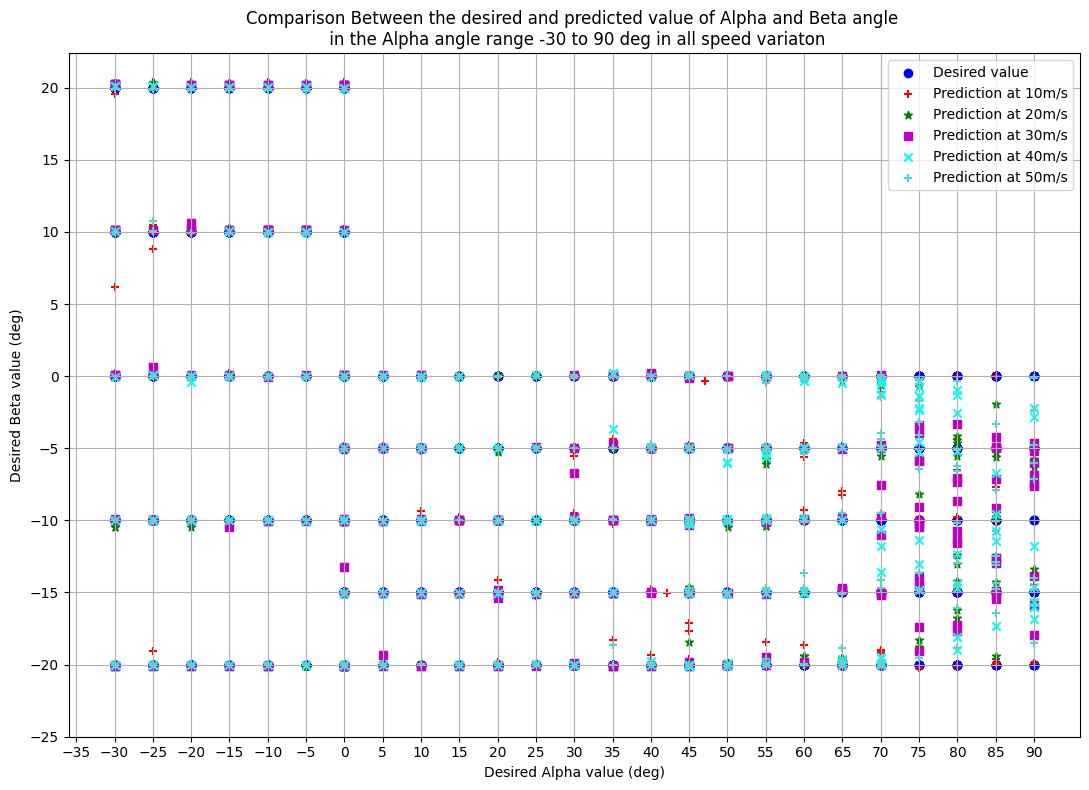

In [69]:
fig = plt.figure(figsize=(11, 8))

# Add first subplot (Alpha vs Beta)
ax1 = fig.add_subplot()
ax1.scatter(y0_test["α"], y0_test["β"], label = 'Desired value', marker='o', color='b')
ax1.scatter(y0_pred_10[1], y0_pred_10[2], label = 'Prediction at 10m/s', marker='+', color='r')
ax1.scatter(y0_pred_20[1], y0_pred_20[2], label = 'Prediction at 20m/s', marker='*', color='green')
ax1.scatter(y0_pred_30[1], y0_pred_30[2], label = 'Prediction at 30m/s', marker='s', color='m')
ax1.scatter(y0_pred_40[1], y0_pred_40[2], label = 'Prediction at 40m/s', marker='x', color='cyan')
ax1.scatter(y0_pred_50[1], y0_pred_50[2], label = 'Prediction at 50m/s', marker='+', color='turquoise')
ax1.set_xlabel('Desired Alpha value (deg)')
ax1.set_ylabel('Desired Beta value (deg)')
ax1.set_xticks(np.arange(-35, 95, 5))
ax1.set_yticks(np.arange(-25, 25, 5))
ax1.set_title('Comparison Between the desired and predicted value of Alpha and Beta angle \n in the Alpha angle range -30 to 90 deg in all speed variaton')
ax1.grid(True)
ax1.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

## REDUCE MAX AERR

In [4]:
reduce_index = []

In [5]:
df_all = pd.read_csv('data_all.csv')
x_all = df_all.drop(columns = ["V","α","β"])
y_all = df_all[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [6]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999518449048 
 Beta : 0.9786085926247874 
 V : 0.9999997006737554 
MAE : 
 Alpha : 0.004298451266537389 
 Beta : 0.550168122812585 
 V : 0.0021246872693424417 
MSE : 
 Alpha : 5.760326756291966e-05 
 Beta : 2.251416282746785 
 V : 6.128302128893325e-05 
Max AERR : 
 V     0.081751
α     0.075188
β    12.733468
dtype: float64
Waktu yang dibutuhkan :  1.3732568383216859


In [7]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_1 = df_all.drop(index = index_max_aerr)
print(len(df_all_clean_1))
reduce_index.append(index_max_aerr)
print(reduce_index)

6749
[4886]


In [8]:
df_all_clean_1

,Pβ2,Pα1,Pβ1,Pα2,P3,V,α,β
0,0.00842,0.00000,0.00337,0.00842,0.05892,10.011648,0,0
1,0.01010,0.00168,0.00337,0.00842,0.05724,10.011648,0,0
2,0.00842,0.00337,0.00505,0.00842,0.05892,10.011648,0,0
3,0.01010,0.00168,0.00337,0.00842,0.05724,10.011648,0,0
4,0.01178,0.00337,0.00337,0.00842,0.05724,10.011648,0,0
...,...,...,...,...,...,...,...,...
6745,-0.80803,-0.15319,0.96291,-0.12626,1.07569,50.038935,0,20
6746,-0.81477,-0.15992,0.96122,-0.12962,1.07233,50.038935,0,20
6747,-0.80803,-0.15824,0.96122,-0.12962,1.07233,50.038935,0,20
6748,-0.80972,-0.15656,0.96291,-0.12457,1.07401,50.038935,0,20


### AFTER REDUCE 1

In [74]:
x_all = df_all_clean_1.drop(columns = ["V","α","β"])
y_all = df_all_clean_1[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [75]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999021319054 
 Beta : 0.9795407808281349 
 V : 0.999999690234584 
MAE : 
 Alpha : 0.004790257706278746 
 Beta : 0.5564742129180307 
 V : 0.0021164319260444514 
MSE : 
 Alpha : 0.0001175703302296086 
 Beta : 2.1680609298130156 
 V : 6.299358978187922e-05 
Max AERR : 
 V     0.081261
α     0.118480
β    11.824073
dtype: float64
Waktu yang dibutuhkan :  1.346963381767273


In [76]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_2 = df_all_clean_1.drop(index = index_max_aerr)
print(len(df_all_clean_2))

6748


### AFTER REDUCE 2

In [77]:
x_all = df_all_clean_2.drop(columns = ["V","α","β"])
y_all = df_all_clean_2[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [78]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999992933625 
 Beta : 0.9796224266543395 
 V : 0.9999997304954433 
MAE : 
 Alpha : 0.0006319235418445089 
 Beta : 0.553685150129843 
 V : 0.0019428039486751954 
MSE : 
 Alpha : 8.41258092765535e-07 
 Beta : 2.205932692662844 
 V : 5.5259299039322e-05 
Max AERR : 
 V     0.084070
α     0.008932
β    13.897936
dtype: float64
Waktu yang dibutuhkan :  1.3456701437632244


In [79]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_3 = df_all_clean_2.drop(index = index_max_aerr)
print(len(df_all_clean_3))

6747


### AFTER REDUCE 3

In [80]:
x_all = df_all_clean_3.drop(columns = ["V","α","β"])
y_all = df_all_clean_3[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [81]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999962897715 
 Beta : 0.9799124587852057 
 V : 0.9999997081851522 
MAE : 
 Alpha : 0.0009426884522679434 
 Beta : 0.5497341181934802 
 V : 0.002107294172288417 
MSE : 
 Alpha : 4.43560840143158e-06 
 Beta : 2.124738592476311 
 V : 5.95254928182116e-05 
Max AERR : 
 V     0.082174
α     0.036301
β    13.842493
dtype: float64
Waktu yang dibutuhkan :  1.3456446806589761


In [82]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_4 = df_all_clean_3.drop(index = index_max_aerr)
print(len(df_all_clean_4))

6746


### AFTER REDUCE 4

In [83]:
x_all = df_all_clean_4.drop(columns = ["V","α","β"])
y_all = df_all_clean_4[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [84]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999992424851 
 Beta : 0.9830145499835 
 V : 0.9999997324550666 
MAE : 
 Alpha : 0.0006444930320737723 
 Beta : 0.5304223075408471 
 V : 0.0018995723076137777 
MSE : 
 Alpha : 9.108658017103407e-07 
 Beta : 1.84683543618431 
 V : 5.374949956678052e-05 
Max AERR : 
 V     0.081587
α     0.010602
β    11.529605
dtype: float64
Waktu yang dibutuhkan :  1.342185910542806


In [85]:
df_all_clean_4.to_csv('data_clean_reduce_4_sec.csv', index = False)

In [86]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_5 = df_all_clean_4.drop(index = index_max_aerr)
print(len(df_all_clean_5))

6745


### AFTER REDUCE 5

In [87]:
x_all = df_all_clean_5.drop(columns = ["V","α","β"])
y_all = df_all_clean_5[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [90]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999990985894 
 Beta : 0.9829301574896132 
 V : 0.9999997271513653 
MAE : 
 Alpha : 0.0008529667078136998 
 Beta : 0.5263667931815713 
 V : 0.001928033875127796 
MSE : 
 Alpha : 1.080529104191424e-06 
 Beta : 1.8140243363640258 
 V : 5.5869608882901275e-05 
Max AERR : 
 V     0.081670
α     0.006061
β    11.387483
dtype: float64
Waktu yang dibutuhkan :  1.3399212201436361


In [91]:
df_all_clean_5.to_csv('data_clean_reduce_5.csv', index = False)

In [92]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_6 = df_all_clean_5.drop(index = index_max_aerr)
print(len(df_all_clean_6))

6744


### AFTER REDUCE 6 

In [93]:
x_all = df_all_clean_6.drop(columns = ["V","α","β"])
y_all = df_all_clean_6[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [95]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999929872324 
 Beta : 0.9795955539260909 
 V : 0.9999997359716261 
MAE : 
 Alpha : 0.0018373364469258721 
 Beta : 0.5624436159153839 
 V : 0.001912599812336011 
MSE : 
 Alpha : 8.33760684774414e-06 
 Beta : 2.1239903293482074 
 V : 5.4008426080416434e-05 
Max AERR : 
 V     0.080810
α     0.029374
β    15.907386
dtype: float64
Waktu yang dibutuhkan :  1.349164326985677


In [96]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_7 = df_all_clean_6.drop(index = index_max_aerr)
print(len(df_all_clean_7))

6743


### AFTER REDUCE 7

In [97]:
x_all = df_all_clean_7.drop(columns = ["V","α","β"])
y_all = df_all_clean_7[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [98]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999992625684 
 Beta : 0.9767216700883262 
 V : 0.9999997364681149 
MAE : 
 Alpha : 0.0007498105001195096 
 Beta : 0.5771159392383252 
 V : 0.001791457540491292 
MSE : 
 Alpha : 9.006102902584043e-07 
 Beta : 2.342079096111067 
 V : 5.4362907679625254e-05 
Max AERR : 
 V     0.080752
α     0.004851
β    13.683202
dtype: float64
Waktu yang dibutuhkan :  1.3618990500768027


In [99]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_8 = df_all_clean_7.drop(index = index_max_aerr)
print(len(df_all_clean_8))

6742


### AFTER REDUCE 8

In [100]:
x_all = df_all_clean_8.drop(columns = ["V","α","β"])
y_all = df_all_clean_8[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [101]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999977560645 
 Beta : 0.9816938348983458 
 V : 0.9999997507218131 
MAE : 
 Alpha : 0.0011856221515241419 
 Beta : 0.5149061510188144 
 V : 0.0018436500366758757 
MSE : 
 Alpha : 2.739043012460526e-06 
 Beta : 1.9083829640531487 
 V : 5.1352859712633046e-05 
Max AERR : 
 V     0.079201
α     0.006674
β    13.233628
dtype: float64
Waktu yang dibutuhkan :  1.3590330004692077


In [102]:
df_all_clean_8.to_csv('data_clean_reduce_8.csv', index = False)

In [103]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_9 = df_all_clean_8.drop(index = index_max_aerr)
print(len(df_all_clean_9))

6741


### AFTER REDUCE 9

In [104]:
x_all = df_all_clean_9.drop(columns = ["V","α","β"])
y_all = df_all_clean_9[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [105]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999977423107 
 Beta : 0.9794348697960439 
 V : 0.9999997630933409 
MAE : 
 Alpha : 0.0011906311328858743 
 Beta : 0.5437707753015074 
 V : 0.001760316664159512 
MSE : 
 Alpha : 2.7628240046203113e-06 
 Beta : 2.1530226214205657 
 V : 4.9158417244831384e-05 
Max AERR : 
 V     0.081076
α     0.011510
β    11.687880
dtype: float64
Waktu yang dibutuhkan :  1.378463856379191


In [106]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_10 = df_all_clean_9.drop(index = index_max_aerr)
print(len(df_all_clean_10))

6740


### AFTER REDUCE 10

In [107]:
x_all = df_all_clean_10.drop(columns = ["V","α","β"])
y_all = df_all_clean_10[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [108]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999925730073 
 Beta : 0.9821881552893735 
 V : 0.9999998093593581 
MAE : 
 Alpha : 0.0016473119551830948 
 Beta : 0.5504381740694586 
 V : 0.001618324464853377 
MSE : 
 Alpha : 9.097090874368382e-06 
 Beta : 1.919817534036367 
 V : 3.925729116486184e-05 
Max AERR : 
 V     0.074662
α     0.038992
β    11.664999
dtype: float64
Waktu yang dibutuhkan :  1.3392890532811483


In [109]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_11 = df_all_clean_10.drop(index = index_max_aerr)
print(len(df_all_clean_11))

6739


### AFTER REDUCE 11

In [110]:
x_all = df_all_clean_11.drop(columns = ["V","α","β"])
y_all = df_all_clean_11[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [111]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999996877952518 
 Beta : 0.9808728563921623 
 V : 0.9999997765952225 
MAE : 
 Alpha : 0.003197853128180393 
 Beta : 0.5546323990497883 
 V : 0.0016225115947708143 
MSE : 
 Alpha : 0.0037376277768060404 
 Beta : 2.040192581830605 
 V : 4.612992683186805e-05 
Max AERR : 
 V     0.080855
α     2.243224
β    13.310088
dtype: float64
Waktu yang dibutuhkan :  1.3397741834322612


In [115]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_12 = df_all_clean_11.drop(index = index_max_aerr)
print(len(df_all_clean_12))

6738


### AFTER REDUCE 12

In [116]:
x_all = df_all_clean_12.drop(columns = ["V","α","β"])
y_all = df_all_clean_12[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [117]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999968891132621 
 Beta : 0.9811288718426721 
 V : 0.9999997631287146 
MAE : 
 Alpha : 0.0027536519791857136 
 Beta : 0.5498818447480365 
 V : 0.001688835437498671 
MSE : 
 Alpha : 0.003702538180602091 
 Beta : 1.9861829048848845 
 V : 4.908968970311647e-05 
Max AERR : 
 V     0.080819
α     2.233329
β    12.529005
dtype: float64
Waktu yang dibutuhkan :  1.3434535662333171


In [118]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_13 = df_all_clean_12.drop(index = index_max_aerr)
print(len(df_all_clean_13))

6737


### AFTER REDUCE 13

In [119]:
x_all = df_all_clean_13.drop(columns = ["V","α","β"])
y_all = df_all_clean_13[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [120]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999912108765188 
 Beta : 0.9818357414994567 
 V : 0.999999708315446 
MAE : 
 Alpha : 0.005876782847587528 
 Beta : 0.5510882803640341 
 V : 0.0019004586174373149 
MSE : 
 Alpha : 0.010427612908079186 
 Beta : 1.9117849983801591 
 V : 6.052707795929299e-05 
Max AERR : 
 V     0.096179
α     2.259274
β    12.759440
dtype: float64
Waktu yang dibutuhkan :  1.3482778310775756


In [121]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_14 = df_all_clean_13.drop(index = index_max_aerr)
print(len(df_all_clean_14))

6736


### AFTER REDUCE 14

In [122]:
x_all = df_all_clean_14.drop(columns = ["V","α","β"])
y_all = df_all_clean_14[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [123]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999967913222163 
 Beta : 0.9817340897929757 
 V : 0.999999735360212 
MAE : 
 Alpha : 0.003099421321567322 
 Beta : 0.5211436695728623 
 V : 0.0018748798939847353 
MSE : 
 Alpha : 0.003738376503911327 
 Beta : 1.9474374275509503 
 V : 5.3286616253545695e-05 
Max AERR : 
 V     0.074637
α     2.243553
β    12.507599
dtype: float64
Waktu yang dibutuhkan :  1.3642444252967834


In [124]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_15 = df_all_clean_14.drop(index = index_max_aerr)
print(len(df_all_clean_15))

6735


### AFTER REDUCE 15

In [125]:
x_all = df_all_clean_15.drop(columns = ["V","α","β"])
y_all = df_all_clean_15[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [126]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999967122678503 
 Beta : 0.9807853912496767 
 V : 0.99999975472453 
MAE : 
 Alpha : 0.004949536973977955 
 Beta : 0.5395252528688 
 V : 0.00186404493944363 
MSE : 
 Alpha : 0.0038085802510005643 
 Beta : 2.0358112693235557 
 V : 4.965521854653391e-05 
Max AERR : 
 V     0.074852
α     2.257351
β    12.634143
dtype: float64
Waktu yang dibutuhkan :  1.3673848867416383


In [127]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_16 = df_all_clean_15.drop(index = index_max_aerr)
print(len(df_all_clean_16))

6734


### AFTER REDUCE 16

In [128]:
x_all = df_all_clean_16.drop(columns = ["V","α","β"])
y_all = df_all_clean_16[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [129]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999722640506 
 Beta : 0.9809908660892865 
 V : 0.9999997261396991 
MAE : 
 Alpha : 0.0033016681508294243 
 Beta : 0.5571939394287377 
 V : 0.0018872762421283439 
MSE : 
 Alpha : 3.276216270262372e-05 
 Beta : 2.0407315616503667 
 V : 5.586147130575189e-05 
Max AERR : 
 V     0.093131
α     0.067307
β    12.690991
dtype: float64
Waktu yang dibutuhkan :  1.3620883782704671


In [131]:
df_all_clean_16.to_csv('data_clean_reduce_16.csv', index = False)

In [130]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_17 = df_all_clean_16.drop(index = index_max_aerr)
print(len(df_all_clean_17))

6733


### AFTER REDUCE 17

In [132]:
x_all = df_all_clean_17.drop(columns = ["V","α","β"])
y_all = df_all_clean_17[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [133]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999994373991255 
 Beta : 0.9823271732801174 
 V : 0.9999997024473392 
MAE : 
 Alpha : 0.005316120317813972 
 Beta : 0.5421112884034904 
 V : 0.002032528539679356 
MSE : 
 Alpha : 0.006742375248242633 
 Beta : 1.7680614062737776 
 V : 6.109224072825296e-05 
Max AERR : 
 V     0.093134
α     2.247940
β    10.299564
dtype: float64
Waktu yang dibutuhkan :  1.3627628604571025


In [134]:
df_all_clean_17.to_csv('data_clean_reduce_17.csv', index = False)

In [135]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_18 = df_all_clean_17.drop(index = index_max_aerr)
print(len(df_all_clean_18))

6732


### AFTER REDUCE 18

In [136]:
x_all = df_all_clean_18.drop(columns = ["V","α","β"])
y_all = df_all_clean_18[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [137]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999944019752142 
 Beta : 0.983853521133361 
 V : 0.9999997045349582 
MAE : 
 Alpha : 0.004907299511346578 
 Beta : 0.5132296172224055 
 V : 0.001998723983645401 
MSE : 
 Alpha : 0.006735134282338777 
 Beta : 1.662180716855062 
 V : 6.059358345280791e-05 
Max AERR : 
 V     0.093805
α     2.247179
β    10.256939
dtype: float64
Waktu yang dibutuhkan :  1.3655627767244976


In [138]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_19 = df_all_clean_18.drop(index = index_max_aerr)
print(len(df_all_clean_19))

6731


### AFTER REDUCE 19

In [139]:
x_all = df_all_clean_19.drop(columns = ["V","α","β"])
y_all = df_all_clean_19[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [140]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999969401329475 
 Beta : 0.981167299757279 
 V : 0.9999997816051944 
MAE : 
 Alpha : 0.0026386980307680145 
 Beta : 0.5458868624051496 
 V : 0.0018230344934212655 
MSE : 
 Alpha : 0.0036460283594278845 
 Beta : 1.9506414332187314 
 V : 4.421093183133372e-05 
Max AERR : 
 V     0.075336
α     2.215593
β    11.581555
dtype: float64
Waktu yang dibutuhkan :  1.3696483691533408


In [141]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_20 = df_all_clean_19.drop(index = index_max_aerr)
print(len(df_all_clean_20))

6730


### AFTER REDUCE 20

In [142]:
x_all = df_all_clean_20.drop(columns = ["V","α","β"])
y_all = df_all_clean_20[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [143]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999969769585978 
 Beta : 0.9837732805159182 
 V : 0.9999997954331127 
MAE : 
 Alpha : 0.0027032337173723566 
 Beta : 0.5379129462059986 
 V : 0.0017677803044817088 
MSE : 
 Alpha : 0.0036097693941727206 
 Beta : 1.6811931307772938 
 V : 4.160353578231792e-05 
Max AERR : 
 V    0.075356
α    2.203072
β    9.040602
dtype: float64
Waktu yang dibutuhkan :  1.361277210712433


In [144]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_21 = df_all_clean_20.drop(index = index_max_aerr)
print(len(df_all_clean_21))

6729


### AFTER REDUCE 21

In [145]:
x_all = df_all_clean_21.drop(columns = ["V","α","β"])
y_all = df_all_clean_21[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [146]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999961535053 
 Beta : 0.9812378375799463 
 V : 0.999999780946691 
MAE : 
 Alpha : 0.0014273109313804805 
 Beta : 0.5346487367627714 
 V : 0.0017798438571449563 
MSE : 
 Alpha : 4.650275097004797e-06 
 Beta : 1.9965503162898368 
 V : 4.5270431837863346e-05 
Max AERR : 
 V     0.081040
α     0.019569
β    16.293239
dtype: float64
Waktu yang dibutuhkan :  1.3483468691507976


In [147]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_22 = df_all_clean_21.drop(index = index_max_aerr)
print(len(df_all_clean_22))

6728


### AFTER REDUCE 22

In [148]:
x_all = df_all_clean_22.drop(columns = ["V","α","β"])
y_all = df_all_clean_22[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [149]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999894312268 
 Beta : 0.9854671309424441 
 V : 0.9999998650516262 
MAE : 
 Alpha : 0.0016037096540434685 
 Beta : 0.47542394189361026 
 V : 0.0014316577039070592 
MSE : 
 Alpha : 1.2071084600412103e-05 
 Beta : 1.5633593614869405 
 V : 2.712960303543747e-05 
Max AERR : 
 V     0.048881
α     0.052283
β    11.654270
dtype: float64
Waktu yang dibutuhkan :  1.3677958170572917


In [150]:
df_all_clean_22.to_csv('data_clean_reduce_22.csv', index = False)

In [151]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_23 = df_all_clean_22.drop(index = index_max_aerr)
print(len(df_all_clean_23))

6727


### AFTER REDUCE 23

In [154]:
x_all = df_all_clean_23.drop(columns = ["V","α","β"])
y_all = df_all_clean_23[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [155]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999937807436 
 Beta : 0.9856542614448092 
 V : 0.9999998496967869 
MAE : 
 Alpha : 0.0012397692513765974 
 Beta : 0.46223609553781386 
 V : 0.0014879345507213932 
MSE : 
 Alpha : 7.077813795261297e-06 
 Beta : 1.503431723484817 
 V : 3.082600059842903e-05 
Max AERR : 
 V     0.061472
α     0.038274
β    11.039069
dtype: float64
Waktu yang dibutuhkan :  1.3644253293673196


In [156]:
df_all_clean_23.to_csv('data_clean_reduce_23.csv', index = False)

In [157]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_24 = df_all_clean_23.drop(index = index_max_aerr)
print(len(df_all_clean_24))

6726


### AFTER REDUCE 24

In [158]:
x_all = df_all_clean_24.drop(columns = ["V","α","β"])
y_all = df_all_clean_24[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [159]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999888364483 
 Beta : 0.9855572270835813 
 V : 0.9999998576576354 
MAE : 
 Alpha : 0.0018578545045363193 
 Beta : 0.4649694558260702 
 V : 0.0014418516960277908 
MSE : 
 Alpha : 1.2746920367403166e-05 
 Beta : 1.5371880960149589 
 V : 2.9044107812892754e-05 
Max AERR : 
 V     0.050330
α     0.048791
β    10.644980
dtype: float64
Waktu yang dibutuhkan :  1.3502382437388103


In [160]:
df_all_clean_24.to_csv('data_clean_reduce_24.csv', index = False)

In [161]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_25 = df_all_clean_24.drop(index = index_max_aerr)
print(len(df_all_clean_25))

6725


### AFTER REDUCE 25

In [171]:
x_all = df_all_clean_25.drop(columns = ["V","α","β"])
y_all = df_all_clean_25[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [172]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.99999999820806 
 Beta : 0.9798908893620512 
 V : 0.9999998000403174 
MAE : 
 Alpha : 0.0008481488503539184 
 Beta : 0.5254819518257944 
 V : 0.0017337923175844475 
MSE : 
 Alpha : 2.1522538353043716e-06 
 Beta : 2.0818811260483003 
 V : 4.124748112184879e-05 
Max AERR : 
 V     0.081532
α     0.015558
β    15.353662
dtype: float64
Waktu yang dibutuhkan :  1.3357726414998372


In [173]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_26 = df_all_clean_25.drop(index = index_max_aerr)
print(len(df_all_clean_26))

6724


### AFTER REDUCE 26

In [174]:
x_all = df_all_clean_26.drop(columns = ["V","α","β"])
y_all = df_all_clean_26[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [175]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999916559487 
 Beta : 0.9825355723110496 
 V : 0.9999998345565159 
MAE : 
 Alpha : 0.0017855769627346072 
 Beta : 0.5250548685573984 
 V : 0.0016276612273108469 
MSE : 
 Alpha : 1.0045595498660677e-05 
 Beta : 1.811809413048171 
 V : 3.3709311460258184e-05 
Max AERR : 
 V     0.065661
α     0.033471
β    11.078367
dtype: float64
Waktu yang dibutuhkan :  1.3461764971415202


In [176]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_27 = df_all_clean_26.drop(index = index_max_aerr)
print(len(df_all_clean_27))

6723


### AFTER REDUCE 27

In [177]:
x_all = df_all_clean_27.drop(columns = ["V","α","β"])
y_all = df_all_clean_27[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [178]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999963831587556 
 Beta : 0.9812804386355614 
 V : 0.9999997836932504 
MAE : 
 Alpha : 0.0032263101641754146 
 Beta : 0.5372027094579968 
 V : 0.0018416802024262603 
MSE : 
 Alpha : 0.004360815406793514 
 Beta : 1.9639109596944404 
 V : 4.406306984735225e-05 
Max AERR : 
 V     0.073099
α     2.420149
β    10.868542
dtype: float64
Waktu yang dibutuhkan :  1.3634572982788087


In [179]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_28 = df_all_clean_27.drop(index = index_max_aerr)
print(len(df_all_clean_28))

6722


### AFTER REDUCE 28

In [180]:
x_all = df_all_clean_28.drop(columns = ["V","α","β"])
y_all = df_all_clean_28[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [181]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999963221815671 
 Beta : 0.9824455465659527 
 V : 0.9999997771078147 
MAE : 
 Alpha : 0.0023245574137863933 
 Beta : 0.5132073256809988 
 V : 0.001786621142399037 
MSE : 
 Alpha : 0.004395077652616706 
 Beta : 1.9628023968731858 
 V : 4.5656366063923915e-05 
Max AERR : 
 V     0.081631
α     2.431214
β    15.139824
dtype: float64
Waktu yang dibutuhkan :  1.36537793080012


In [182]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_29 = df_all_clean_28.drop(index = index_max_aerr)
print(len(df_all_clean_29))

6721


### AFTER REDUCE 29

In [183]:
x_all = df_all_clean_29.drop(columns = ["V","α","β"])
y_all = df_all_clean_29[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [184]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999963515504724 
 Beta : 0.9801295761437189 
 V : 0.999999784887744 
MAE : 
 Alpha : 0.0028467968640199285 
 Beta : 0.5541131694556948 
 V : 0.0018435584239906789 
MSE : 
 Alpha : 0.004408927766961192 
 Beta : 2.0955554785039885 
 V : 4.469636422254106e-05 
Max AERR : 
 V     0.073177
α     2.434725
β    14.191435
dtype: float64
Waktu yang dibutuhkan :  1.3561073064804077


In [185]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_30 = df_all_clean_29.drop(index = index_max_aerr)
print(len(df_all_clean_30))

6720


### AFTER REDUCE 30

In [186]:
x_all = df_all_clean_30.drop(columns = ["V","α","β"])
y_all = df_all_clean_30[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [187]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999962775768265 
 Beta : 0.9824361961614455 
 V : 0.9999997969628064 
MAE : 
 Alpha : 0.0025968493450755775 
 Beta : 0.5302875295104735 
 V : 0.001656562981409984 
MSE : 
 Alpha : 0.004390817527754494 
 Beta : 1.783030394462947 
 V : 4.168660371969786e-05 
Max AERR : 
 V     0.073747
α     2.428958
β    10.926601
dtype: float64
Waktu yang dibutuhkan :  1.355182957649231


In [188]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_31 = df_all_clean_30.drop(index = index_max_aerr)
print(len(df_all_clean_31))

6719


### AFTER REDUCE 31

In [189]:
x_all = df_all_clean_31.drop(columns = ["V","α","β"])
y_all = df_all_clean_31[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [190]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999983520422 
 Beta : 0.9821740416561541 
 V : 0.9999997401265426 
MAE : 
 Alpha : 0.0009821838769820115 
 Beta : 0.5054334293470013 
 V : 0.0017240360487223109 
MSE : 
 Alpha : 1.95059676282716e-06 
 Beta : 1.8116447186076778 
 V : 5.302763606304846e-05 
Max AERR : 
 V     0.094025
α     0.010635
β    11.065227
dtype: float64
Waktu yang dibutuhkan :  1.3774171471595764


In [191]:
df_all_clean_31.to_csv('data_clean_reduce_31.csv', index = False)

In [192]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_32 = df_all_clean_31.drop(index = index_max_aerr)
print(len(df_all_clean_32))

6718


### AFTER REDUCE 32

In [193]:
x_all = df_all_clean_32.drop(columns = ["V","α","β"])
y_all = df_all_clean_32[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [194]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999999946255749 
 Beta : 0.9818899483589979 
 V : 0.999999714457658 
MAE : 
 Alpha : 0.004430387583547715 
 Beta : 0.5357609311513397 
 V : 0.001726130515999931 
MSE : 
 Alpha : 6.52715867004371e-05 
 Beta : 1.943000476644283 
 V : 5.713902209270185e-05 
Max AERR : 
 V     0.113486
α     0.091069
β    10.659953
dtype: float64
Waktu yang dibutuhkan :  1.3678235014279683


In [195]:
df_all_clean_32.to_csv('data_clean_reduce_32.csv', index = False)

In [196]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_33 = df_all_clean_32.drop(index = index_max_aerr)
print(len(df_all_clean_33))

6717


### AFTER REDUCE 33

In [197]:
x_all = df_all_clean_33.drop(columns = ["V","α","β"])
y_all = df_all_clean_33[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [198]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999929117883 
 Beta : 0.9836774460980304 
 V : 0.9999997399137506 
MAE : 
 Alpha : 0.0017313113033964084 
 Beta : 0.5190037787815875 
 V : 0.001635930557904389 
MSE : 
 Alpha : 8.341195428914437e-06 
 Beta : 1.6895056318470818 
 V : 5.365811557680454e-05 
Max AERR : 
 V     0.113560
α     0.030117
β    10.509367
dtype: float64
Waktu yang dibutuhkan :  1.365911638736725


In [199]:
df_all_clean_33.to_csv('data_clean_reduce_33.csv', index = False)

In [200]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_34 = df_all_clean_33.drop(index = index_max_aerr)
print(len(df_all_clean_34))

6716


### AFTER REDUCE 34

In [203]:
x_all = df_all_clean_34.drop(columns = ["V","α","β"])
y_all = df_all_clean_34[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [204]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999999967951214 
 Beta : 0.9839449718066261 
 V : 0.9999997072170849 
MAE : 
 Alpha : 0.0028275639217598385 
 Beta : 0.5067271176626417 
 V : 0.0017830715074620947 
MSE : 
 Alpha : 3.715496043799592e-05 
 Beta : 1.5626973746253983 
 V : 6.07299782750542e-05 
Max AERR : 
 V    0.128524
α    0.060884
β    9.483374
dtype: float64
Waktu yang dibutuhkan :  1.368223778406779


In [205]:
df_all_clean_34.to_csv('data_clean_reduce_34.csv', index = False)

In [206]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_35 = df_all_clean_34.drop(index = index_max_aerr)
print(len(df_all_clean_35))

6715


### AFTER REDUCE 35

In [207]:
x_all = df_all_clean_35.drop(columns = ["V","α","β"])
y_all = df_all_clean_35[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [208]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999963811846405 
 Beta : 0.979997937921091 
 V : 0.9999996906442364 
MAE : 
 Alpha : 0.0032987120161919624 
 Beta : 0.5397355993074466 
 V : 0.0018915450311776578 
MSE : 
 Alpha : 0.0043721918801555675 
 Beta : 2.0810412433121317 
 V : 6.27023159833394e-05 
Max AERR : 
 V     0.081074
α     2.421975
β    10.652562
dtype: float64
Waktu yang dibutuhkan :  1.375903884569804


In [209]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_36 = df_all_clean_35.drop(index = index_max_aerr)
print(len(df_all_clean_36))

6714


### AFTER REDUCE 36

In [210]:
x_all = df_all_clean_36.drop(columns = ["V","α","β"])
y_all = df_all_clean_36[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [211]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999963617144283 
 Beta : 0.9792662900848885 
 V : 0.9999996807612582 
MAE : 
 Alpha : 0.003061684337770895 
 Beta : 0.5579853036871215 
 V : 0.0019455808560675427 
MSE : 
 Alpha : 0.004366180612444585 
 Beta : 2.163285323805582 
 V : 6.509332172252092e-05 
Max AERR : 
 V    0.081068
α    2.420607
β    9.210934
dtype: float64
Waktu yang dibutuhkan :  1.372768497467041


In [212]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_37 = df_all_clean_36.drop(index = index_max_aerr)
print(len(df_all_clean_37))

6713


### AFTER REDUCE 37

In [213]:
x_all = df_all_clean_37.drop(columns = ["V","α","β"])
y_all = df_all_clean_37[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [214]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999839915337135 
 Beta : 0.9849423681191495 
 V : 0.9999997612243964 
MAE : 
 Alpha : 0.005565585688195999 
 Beta : 0.48305075977845774 
 V : 0.001703490379209234 
MSE : 
 Alpha : 0.018418622479740604 
 Beta : 1.6157683226128905 
 V : 4.900237150008778e-05 
Max AERR : 
 V    0.081294
α    4.972525
β    9.947921
dtype: float64
Waktu yang dibutuhkan :  1.363714341322581


In [215]:
df_all_clean_37.to_csv('data_clean_reduce_37.csv', index = False)

In [216]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_38 = df_all_clean_37.drop(index = index_max_aerr)
print(len(df_all_clean_38))

6712


### AFTER REDUCE 38

In [217]:
x_all = df_all_clean_38.drop(columns = ["V","α","β"])
y_all = df_all_clean_38[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [218]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999965311115768 
 Beta : 0.9818624603492634 
 V : 0.9999997703671302 
MAE : 
 Alpha : 0.003946634844346893 
 Beta : 0.5239029360325131 
 V : 0.0018043217659694647 
MSE : 
 Alpha : 0.004139499559280123 
 Beta : 1.909013182626782 
 V : 4.6841804811125174e-05 
Max AERR : 
 V     0.082751
α     2.354273
β    10.966874
dtype: float64
Waktu yang dibutuhkan :  1.3448511123657227


In [219]:
df_all_clean_38.to_csv('data_clean_reduce_38.csv', index = False)

In [220]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_39 = df_all_clean_38.drop(index = index_max_aerr)
print(len(df_all_clean_39))

6711


### AFTER REDUCE 39

In [221]:
x_all = df_all_clean_39.drop(columns = ["V","α","β"])
y_all = df_all_clean_39[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [222]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999965221524133 
 Beta : 0.9838089296773529 
 V : 0.9999997852126081 
MAE : 
 Alpha : 0.005205626016664621 
 Beta : 0.5241321949381805 
 V : 0.001597354088768921 
MSE : 
 Alpha : 0.004164253390496275 
 Beta : 1.6913625232909706 
 V : 4.423318125438573e-05 
Max AERR : 
 V     0.080733
α     2.355570
β    11.307684
dtype: float64
Waktu yang dibutuhkan :  1.3687007943789165


In [223]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_40 = df_all_clean_39.drop(index = index_max_aerr)
print(len(df_all_clean_40))

6710


### AFTER REDUCE 40

In [224]:
x_all = df_all_clean_40.drop(columns = ["V","α","β"])
y_all = df_all_clean_40[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [225]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999996624881492 
 Beta : 0.9821734508345713 
 V : 0.9999997594056006 
MAE : 
 Alpha : 0.0025939674354348674 
 Beta : 0.49535960173340143 
 V : 0.001766143234843747 
MSE : 
 Alpha : 0.004090642801430353 
 Beta : 1.8182119713067495 
 V : 5.004632495611879e-05 
Max AERR : 
 V     0.080342
α     2.342545
β    11.118653
dtype: float64
Waktu yang dibutuhkan :  1.36104367574056


In [229]:
df_all_clean_40.to_csv('data_clean_reduce_40.csv', index = False)

In [226]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_41 = df_all_clean_40.drop(index = index_max_aerr)
print(len(df_all_clean_41))

6709


### AFTER REDUCE 41

In [227]:
x_all = df_all_clean_41.drop(columns = ["V","α","β"])
y_all = df_all_clean_41[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [228]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999965238145643 
 Beta : 0.9840710064656516 
 V : 0.9999997198644336 
MAE : 
 Alpha : 0.001766404757954225 
 Beta : 0.5123408492796071 
 V : 0.001963765359229699 
MSE : 
 Alpha : 0.004096636959006909 
 Beta : 1.625342612258085 
 V : 5.629967924565615e-05 
Max AERR : 
 V    0.093990
α    2.344714
β    9.542676
dtype: float64
Waktu yang dibutuhkan :  1.3435577869415283


In [230]:
df_all_clean_41.to_csv('data_clean_reduce_41.csv', index = False)

In [231]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_42 = df_all_clean_41.drop(index = index_max_aerr)
print(len(df_all_clean_42))

6708


### AFTER REDUCE 42

In [232]:
x_all = df_all_clean_42.drop(columns = ["V","α","β"])
y_all = df_all_clean_42[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [233]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999996278519 
 Beta : 0.9811034192724242 
 V : 0.9999997755556026 
MAE : 
 Alpha : 0.0005067256646959673 
 Beta : 0.536478964706266 
 V : 0.0019037938256937505 
MSE : 
 Alpha : 4.4817768368059287e-07 
 Beta : 1.9582872931211877 
 V : 4.607731089346815e-05 
Max AERR : 
 V     0.069564
α     0.003415
β    10.862260
dtype: float64
Waktu yang dibutuhkan :  1.3510639349619546


In [234]:
df_all_clean_42.to_csv('data_clean_reduce_42.csv', index = False)

In [235]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_43 = df_all_clean_42.drop(index = index_max_aerr)
print(len(df_all_clean_43))

6707


### AFTER REDUCE 43

In [236]:
x_all = df_all_clean_43.drop(columns = ["V","α","β"])
y_all = df_all_clean_43[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [237]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.999999999441998 
 Beta : 0.9820377007156834 
 V : 0.9999997740176292 
MAE : 
 Alpha : 0.000563950746867112 
 Beta : 0.5185476199329825 
 V : 0.0019153666460560556 
MSE : 
 Alpha : 6.691968428898847e-07 
 Beta : 1.8627466197075315 
 V : 4.6124760086140574e-05 
Max AERR : 
 V     0.069401
α     0.007515
β    10.441031
dtype: float64
Waktu yang dibutuhkan :  1.3674418727556865


In [238]:
df_all_clean_43.to_csv('data_clean_reduce_43.csv', index = False)

In [239]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_44 = df_all_clean_43.drop(index = index_max_aerr)
print(len(df_all_clean_44))

6706


### AFTER REDUCE 44

In [240]:
x_all = df_all_clean_44.drop(columns = ["V","α","β"])
y_all = df_all_clean_44[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [241]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999996264363 
 Beta : 0.981772708498175 
 V : 0.999999778488748 
MAE : 
 Alpha : 0.0005035485193661965 
 Beta : 0.5118445650258542 
 V : 0.0017960030058568428 
MSE : 
 Alpha : 4.4300062106701006e-07 
 Beta : 1.8843421186582394 
 V : 4.477062144547562e-05 
Max AERR : 
 V    0.069993
α    0.003851
β    9.737665
dtype: float64
Waktu yang dibutuhkan :  1.35781325896581


In [242]:
df_all_clean_44.to_csv('data_clean_reduce_44.csv', index = False)

In [243]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_45 = df_all_clean_44.drop(index = index_max_aerr)
print(len(df_all_clean_45))

6705


### AFTER REDUCE 45

In [244]:
x_all = df_all_clean_45.drop(columns = ["V","α","β"])
y_all = df_all_clean_45[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [245]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999995244421 
 Beta : 0.9830837324627615 
 V : 0.999999770469875 
MAE : 
 Alpha : 0.0005447841151469834 
 Beta : 0.5035030643021045 
 V : 0.0018060697886233658 
MSE : 
 Alpha : 5.650942434187501e-07 
 Beta : 1.7695517148533892 
 V : 4.637711436449344e-05 
Max AERR : 
 V    0.076459
α    0.005109
β    9.781507
dtype: float64
Waktu yang dibutuhkan :  1.3552622596422832


In [246]:
df_all_clean_45.to_csv('data_clean_reduce_45.csv', index = False)

In [247]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_46 = df_all_clean_45.drop(index = index_max_aerr)
print(len(df_all_clean_46))

6704


### AFTER REDUCE 46

In [248]:
x_all = df_all_clean_46.drop(columns = ["V","α","β"])
y_all = df_all_clean_46[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [249]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999826828339 
 Beta : 0.9837204604926633 
 V : 0.9999997932233007 
MAE : 
 Alpha : 0.0023807413237649055 
 Beta : 0.4854224766071392 
 V : 0.0017509570794222921 
MSE : 
 Alpha : 2.060567080908642e-05 
 Beta : 1.6786276420918584 
 V : 4.25583557899402e-05 
Max AERR : 
 V    0.081666
α    0.046313
β    9.338302
dtype: float64
Waktu yang dibutuhkan :  1.3547831853230794


In [250]:
df_all_clean_46.to_csv('data_clean_reduce_46.csv', index = False)

In [251]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_47 = df_all_clean_46.drop(index = index_max_aerr)
print(len(df_all_clean_47))

6703


### AFTER REDUCE 47

In [252]:
x_all = df_all_clean_47.drop(columns = ["V","α","β"])
y_all = df_all_clean_47[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [253]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999970017914 
 Beta : 0.9827236131236389 
 V : 0.9999997108691355 
MAE : 
 Alpha : 0.0012019268944863995 
 Beta : 0.5064698755349399 
 V : 0.0017995222549893085 
MSE : 
 Alpha : 3.5755851015166263e-06 
 Beta : 1.857400297997501 
 V : 5.880071150497988e-05 
Max AERR : 
 V    0.081177
α    0.015990
β    9.594400
dtype: float64
Waktu yang dibutuhkan :  1.3567596038182577


In [254]:
df_all_clean_47.to_csv('data_clean_reduce_47.csv', index = False)

In [255]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_48 = df_all_clean_47.drop(index = index_max_aerr)
print(len(df_all_clean_48))

6702


### AFTER REDUCE 48

In [258]:
x_all = df_all_clean_48.drop(columns = ["V","α","β"])
y_all = df_all_clean_48[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [259]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999881786453 
 Beta : 0.9829390699136423 
 V : 0.9999997891179636 
MAE : 
 Alpha : 0.0018596717162869183 
 Beta : 0.49157507828951325 
 V : 0.0015617674959712278 
MSE : 
 Alpha : 1.4160155787342299e-05 
 Beta : 1.7312980644420817 
 V : 4.236792700880534e-05 
Max AERR : 
 V     0.081091
α     0.047192
β    10.740986
dtype: float64
Waktu yang dibutuhkan :  1.3618118683497111


In [260]:
df_all_clean_48.to_csv('data_clean_reduce_48.csv', index = False)

In [261]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_49 = df_all_clean_48.drop(index = index_max_aerr)
print(len(df_all_clean_49))

6701


### AFTER REDUCE 49

In [263]:
x_all = df_all_clean_49.drop(columns = ["V","α","β"])
y_all = df_all_clean_49[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [264]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999994029904 
 Beta : 0.9860855658897006 
 V : 0.9999997959353267 
MAE : 
 Alpha : 0.0006448033702425183 
 Beta : 0.45987266895584933 
 V : 0.0015169087298261845 
MSE : 
 Alpha : 7.123840311497271e-07 
 Beta : 1.485088085482875 
 V : 4.257259692744618e-05 
Max AERR : 
 V    0.085746
α    0.004031
β    8.585756
dtype: float64
Waktu yang dibutuhkan :  1.3721176385879517


In [265]:
df_all_clean_49.to_csv('data_clean_reduce_49.csv', index = False)

In [266]:
y_pred_df = pd.DataFrame(y0_pred, columns = ["V","α","β"], index = y0_test.index)
aerr = np.abs(y_pred_df - y0_test)
index_max_aerr = aerr["β"].idxmax()
df_all_clean_50 = df_all_clean_49.drop(index = index_max_aerr)
print(len(df_all_clean_50))

6700


### AFTER REDUCE 50

In [267]:
x_all = df_all_clean_50.drop(columns = ["V","α","β"])
y_all = df_all_clean_50[["V","α","β"]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x_all, y_all,
                                                        random_state = 42, test_size = 0.2)

In [268]:
def max_absolute_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred), axis=0)
scaler = StandardScaler()

# Base models (Level Pertama)
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=250, max_depth=None, random_state=42, min_samples_leaf= 1, min_samples_split= 2, max_features = 'sqrt')),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.0579, random_state=42, max_depth = 5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto')))
]

# Meta-model (Level Kedua)
# Menggunakan Ridge Regression sebagai meta-model untuk menghindari overfitting
meta_model = Ridge(alpha=0.1)

# Membentuk Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Memasukkan data asli ke meta-model bersama prediksi base models
)

# Untuk multi-output, kita bungkus dengan MultiOutputRegressor
model_all_best = MultiOutputRegressor(stacking_regressor)
start = time.time()
# Training
model_all_best.fit(x0_train, y0_train)
end = time.time()
waktu = (end-start)/60
# Prediction
y0_pred = model_all_best.predict(x0_test)
r2 = r2_score(y0_test, y0_pred, multioutput = 'raw_values')
mae = mean_absolute_error(y0_test, y0_pred, multioutput = 'raw_values')
mse = mean_squared_error(y0_test, y0_pred, multioutput = 'raw_values')
max_ae = max_absolute_error(y0_test, y0_pred)
print(f'R2 : \n Alpha : {r2[1]} \n Beta : {r2[2]} \n V : {r2[0]} ')
print(f'MAE : \n Alpha : {mae[1]} \n Beta : {mae[2]} \n V : {mae[0]} ')
print(f'MSE : \n Alpha : {mse[1]} \n Beta : {mse[2]} \n V : {mse[0]} ')
print('Max AERR : \n', max_ae)
print("Waktu yang dibutuhkan : ", waktu)

R2 : 
 Alpha : 0.9999999907109346 
 Beta : 0.986261151519153 
 V : 0.999999772488488 
MAE : 
 Alpha : 0.0025688214226106234 
 Beta : 0.44647977424756746 
 V : 0.0018628618382679355 
MSE : 
 Alpha : 1.1071687875781727e-05 
 Beta : 1.4753201834575214 
 V : 4.7292676252341316e-05 
Max AERR : 
 V     0.071181
α     0.013114
β    11.317581
dtype: float64
Waktu yang dibutuhkan :  1.3582358479499816
